## Test Model 2030

In [1]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs

#pd.set_option("display.max_rows", None)  # Display all rows
#pd.set_option("display.max_columns", None)  # Display all columns


## Import Network

In [2]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\20240313IT\\elec_s_7_ec_lv1.5_Co2L0.4-3h.nc")


INFO:pypsa.io:Imported network elec_s_7_ec_lv1.5_Co2L0.4-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [49]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 21 entries
Component 'Carrier' has 25 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 6 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 29 entries
Component 'Load' has 7 entries
Component 'Generator' has 109 entries
Component 'StorageUnit' has 13 entries
Component 'Store' has 14 entries


In [50]:
n.global_constraints

,type,carrier_attribute,sense,constant,mu,investment_period
GlobalConstraint,,,,,,
CO2Limit,primary_energy,co2_emissions,<=,5.948000e+08,-0.0,NaN
lv_limit,transmission_volume_expansion_limit,"AC, DC",<=,2.661619e+07,-0.0,NaN


In [7]:
n.lines.s_nom_opt

Line
0     8490.513068
1     3396.205481
2     8982.069386
3    12646.395860
4    16042.602568
5     3396.205239
Name: s_nom_opt, dtype: float64

In [12]:
n.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,weight,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
IT0 0 CCGT,CCGT,IT0 0,0.000000,0.000000e+00,False,0.580000,46.812917,104788.020783,inf,20.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 OCGT,OCGT,IT0 0,5657.000000,5.657000e+03,True,0.379841,74.314647,47718.670564,inf,28.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 biomass,biomass,IT0 0,150.000000,1.500000e+02,False,0.468000,15.837570,294201.051170,inf,21.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 coal,coal,IT0 0,2415.474826,2.415475e+03,False,0.330000,32.222672,337208.027448,inf,22.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 geothermal,geothermal,IT0 0,0.000000,0.000000e+00,False,1.000000,0.010063,0.000000,inf,20.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT0 2 battery load,load,IT0 2 battery,0.000000,1.000000e+09,False,1.000000,1500.000000,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 3 battery load,load,IT0 3 battery,0.000000,1.000000e+09,False,1.000000,1500.000000,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 4 battery load,load,IT0 4 battery,0.000000,1.000000e+09,False,1.000000,1500.000000,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [13]:
# set marginal_cost load shedding

# Assuming n.generators.carrier and n.generators.marginal_cost are lists
for i in range(len(n.generators.carrier)):
    if n.generators.carrier[i] == 'load':
        n.generators.marginal_cost[i] = 1500

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_12444\3780980008.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if n.generators.carrier[i] == 'load':
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_12444\3780980008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.generators.marginal_cost[i] = 1500
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_12444\3780980008.py:6: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  n.generators.ma

In [45]:
#resolve model
n.lopf(solver_name='gurobi')

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_12444\403696289.py:2: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n.lopf(solver_name='gurobi')
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 8.83s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\pypsa-problem-9a4sxayj.lp
Reading time = 5.08 seconds
obj: 1293562 rows, 636642 columns, 2432177 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1293562 rows, 636642 columns and 2432177 nonzeros
Model fingerprint: 0x3ea74544
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [3e-02, 2e+05]
  Bounds range     [1e+00, 3e+09]
  RHS range        [2e+00, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 978467 rows and 193177 columns
Presolve time: 2.10s
Presolved: 315095 rows, 443465 columns, 1161261 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Orde

INFO:pypsa.linopf:Optimization successful. Objective value: 1.16e+10


('ok', 'optimal')

In [46]:
stat_base = n.statistics()
stat_base

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas        0.000000e+00        0.000000e+00   
            Load shedding             2.100000e+10        2.100000e+10   
            Offshore Wind (AC)        0.000000e+00        0.000000e+00   
            Offshore Wind (DC)        0.000000e+00        0.000000e+00   
            Onshore Wind              0.000000e+00        0.000000e+00   
            Open-Cycle Gas            3.942020e+04        3.942020e+04   
            Run of River              7.871540e+03        7.871540e+03   
            Solar                     9.052589e+04        0.000000e+00   
            biomass                   5.080000e+02        5.080000e+02   
            coal                      7.275926e+03        7.275926e+03   
            geothermal                5.900000e+01        5.900000e+01   
            lignite                   0.000000e+00        0.000000e+00   
            nuclear                   0.000000e+00        0.000000e+00   
            oil                       1.500000e+02        1.500000e+02   
Line        AC                        5.295399e+04        5.295399e+04   
Link        DC                        1.000000e+03        1.000000e+03   
            H2 electrolysis           0.000000e+00        0.000000e+00   
            H2 fuel cell              0.000000e+00        0.000000e+00   
            battery charger           0.000000e+00        0.000000e+00   
            battery discharger        0.000000e+00        0.000000e+00   
Load        -                         0.000000e+00        0.000000e+00   
StorageUnit Pumped Hydro Storage      7.571900e+03        7.571900e+03   
            Reservoir & Dam           4.194800e+03        4.194800e+03   
Store       Battery Storage           0.000000e+00        0.000000e+00   
            Hydrogen Storage          0.000000e+00        0.000000e+00   

                                  Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas                NaN  0.000000e+00  0.000000e+00   
            Load shedding                0.000000  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)                NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (DC)                NaN  0.000000e+00  0.000000e+00   
            Onshore Wind                      NaN  0.000000e+00  0.000000e+00   
            Open-Cycle Gas               0.289547  9.998666e+07  0.000000e+00   
            Run of River                 0.478771  3.301350e+07  0.000000e+00   
            Solar                        0.139545  1.106599e+08  0.000000e+00   
            biomass                      0.888853  3.955465e+06  0.000000e+00   
            coal                         0.856983  5.462166e+07  0.000000e+00   
            geothermal                   1.000000  5.168400e+05  0.000000e+00   
            lignite                           NaN  0.000000e+00  0.000000e+00   
            nuclear                           NaN  0.000000e+00  0.000000e+00   
            oil                          0.000000  0.000000e+00  0.000000e+00   
Line        AC                           0.295828  0.000000e+00 -2.466291e+07   
Link        DC                           0.543354  0.000000e+00 -4.395288e+06   
            H2 electrolysis                   NaN  0.000000e+00  0.000000e+00   
            H2 fuel cell                      NaN  0.000000e+00  0.000000e+00   
            battery charger                   NaN  0.000000e+00  0.000000e+00   
            battery discharger                NaN  0.000000e+00  0.000000e+00   
Load        -                                 NaN -3.160267e+08  0.000000e+00   
StorageUnit Pumped Hydro Storage         0.324416 -3.074065e+06  0.000000e+00   
            Reservoir & Dam              0.444855  1.634683e+07  0.000000e+00   
Store       Battery Storage                   NaN  0.000000e+00  0.000000e+00   
            Hydrogen Storage                  NaN  0.000000e+00  0.000000e+00   

  

## Plot Network

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


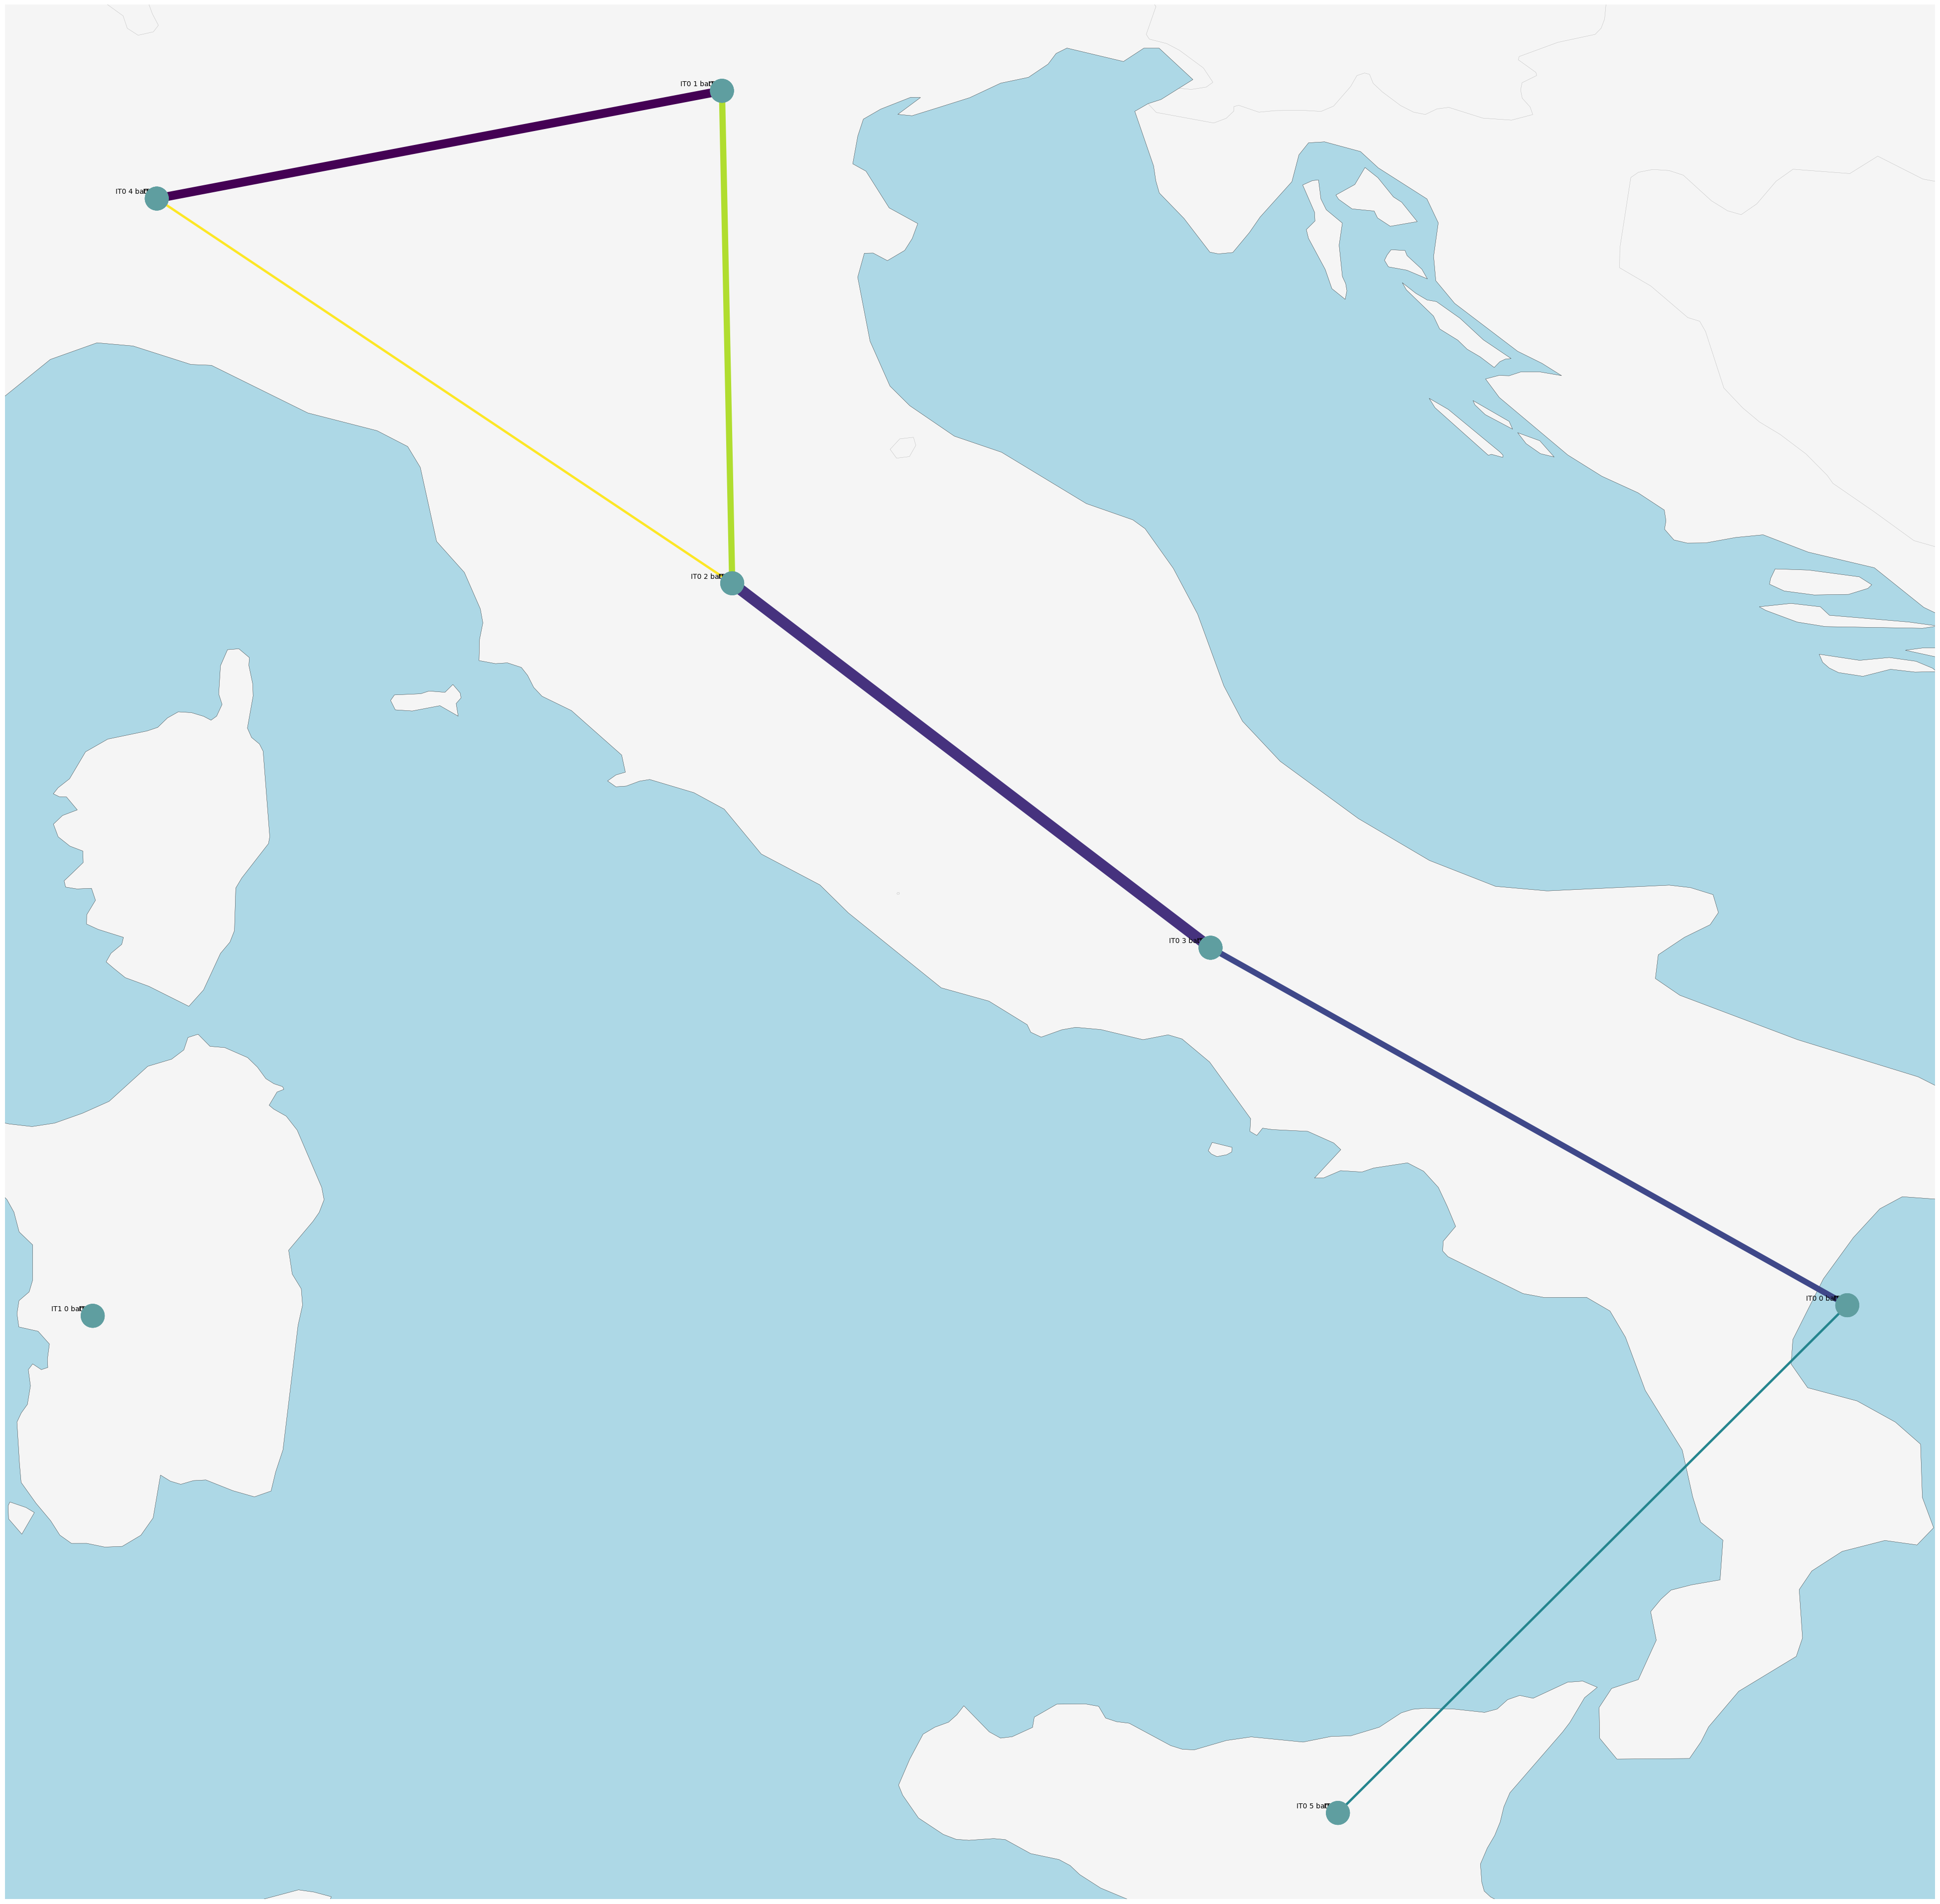

In [16]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(50,50),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show





## Installed Capcity

In [17]:
def inst_cap_plot():

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()

    plt.rcParams.update({'font.size': 16})

    fig = plt.figure(figsize=(50,50))
    ax = plt.axes(projection=ccrs.PlateCarree())

    n.plot(
        ax=ax,
        margin=0.3,
        bus_sizes= capacities / 1e11,
        title=f"Installed power capacities"
    )

    add_legend_patches(
        ax,
        n.carriers.color,
        n.carriers.index,
        legend_kw=dict(frameon=False, bbox_to_anchor=(0,1))
    )

    return capacities

ValueError: Invalid RGBA argument: ''

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


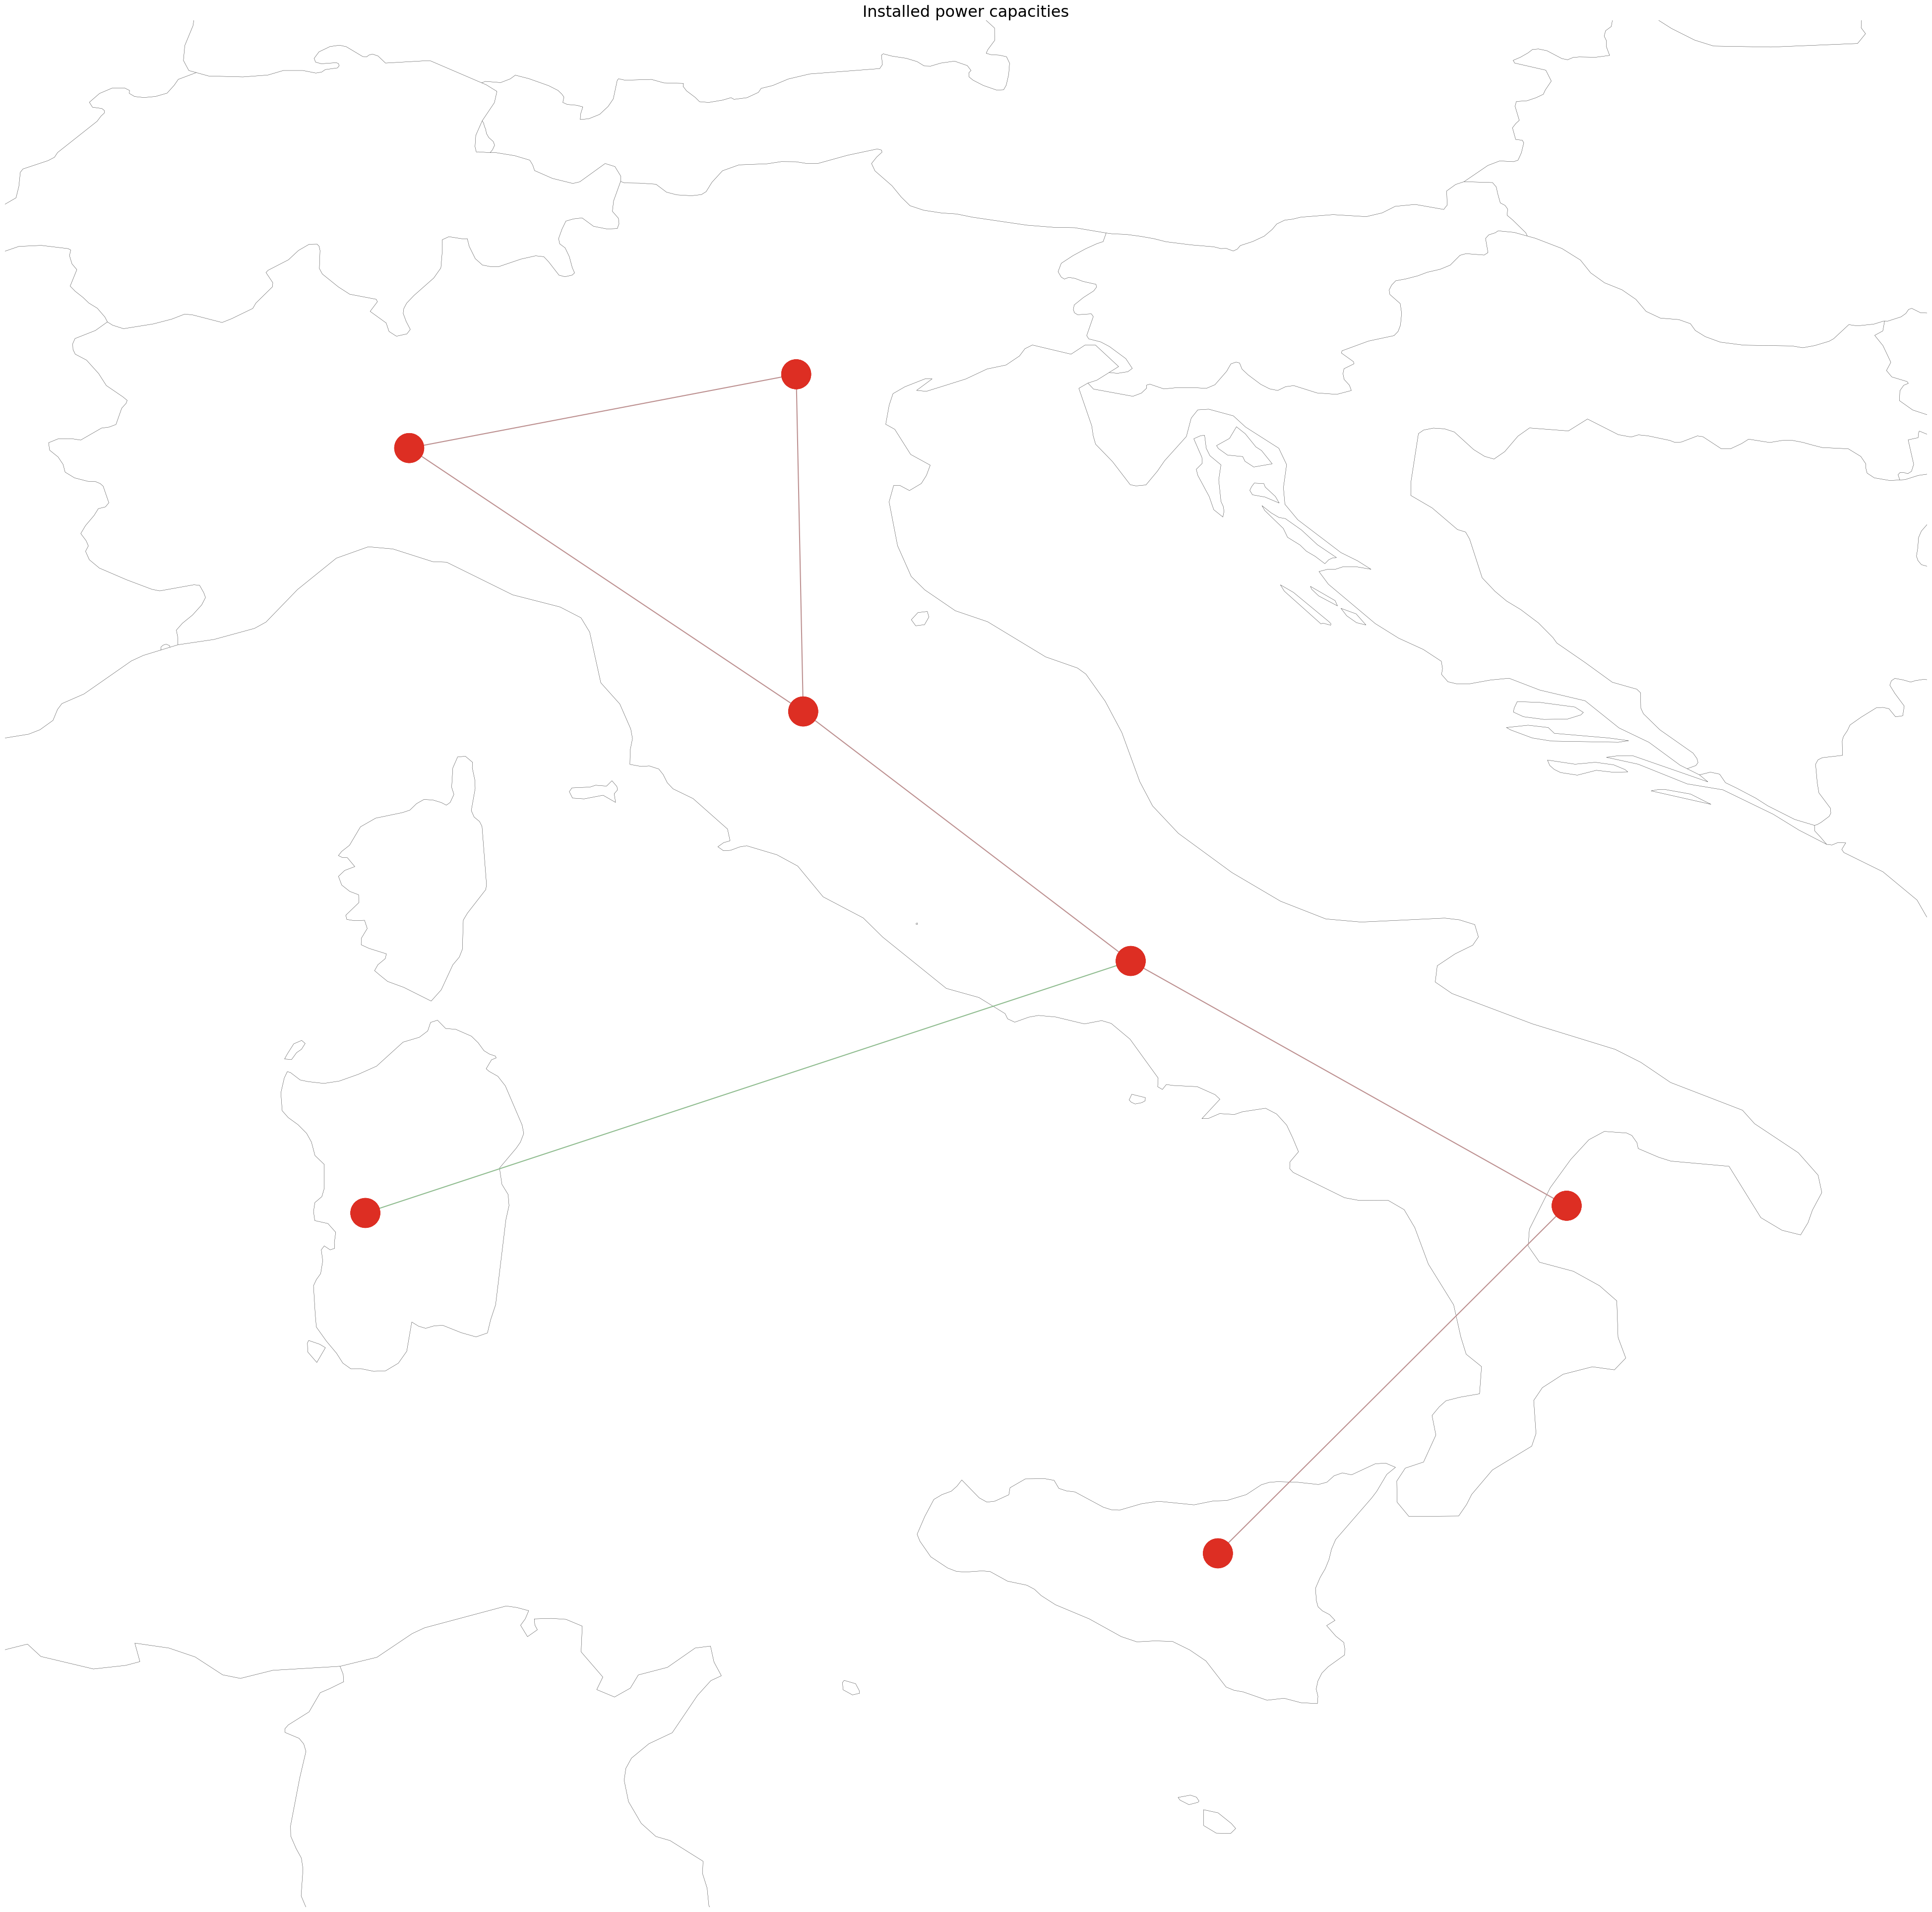

In [18]:
inst_cap_plot()

In [47]:
gen = n.generators
carrier = gen.carrier.unique()
colors = [
    "grey", "indianred", "yellow", "blue", "aquamarine",
    "black", "dodgerblue", "gold", "yellowgreen", "magenta",
    "cyan", "orange", "lightgreen"
]

def gen_power_table(colors):

    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    (generations.unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

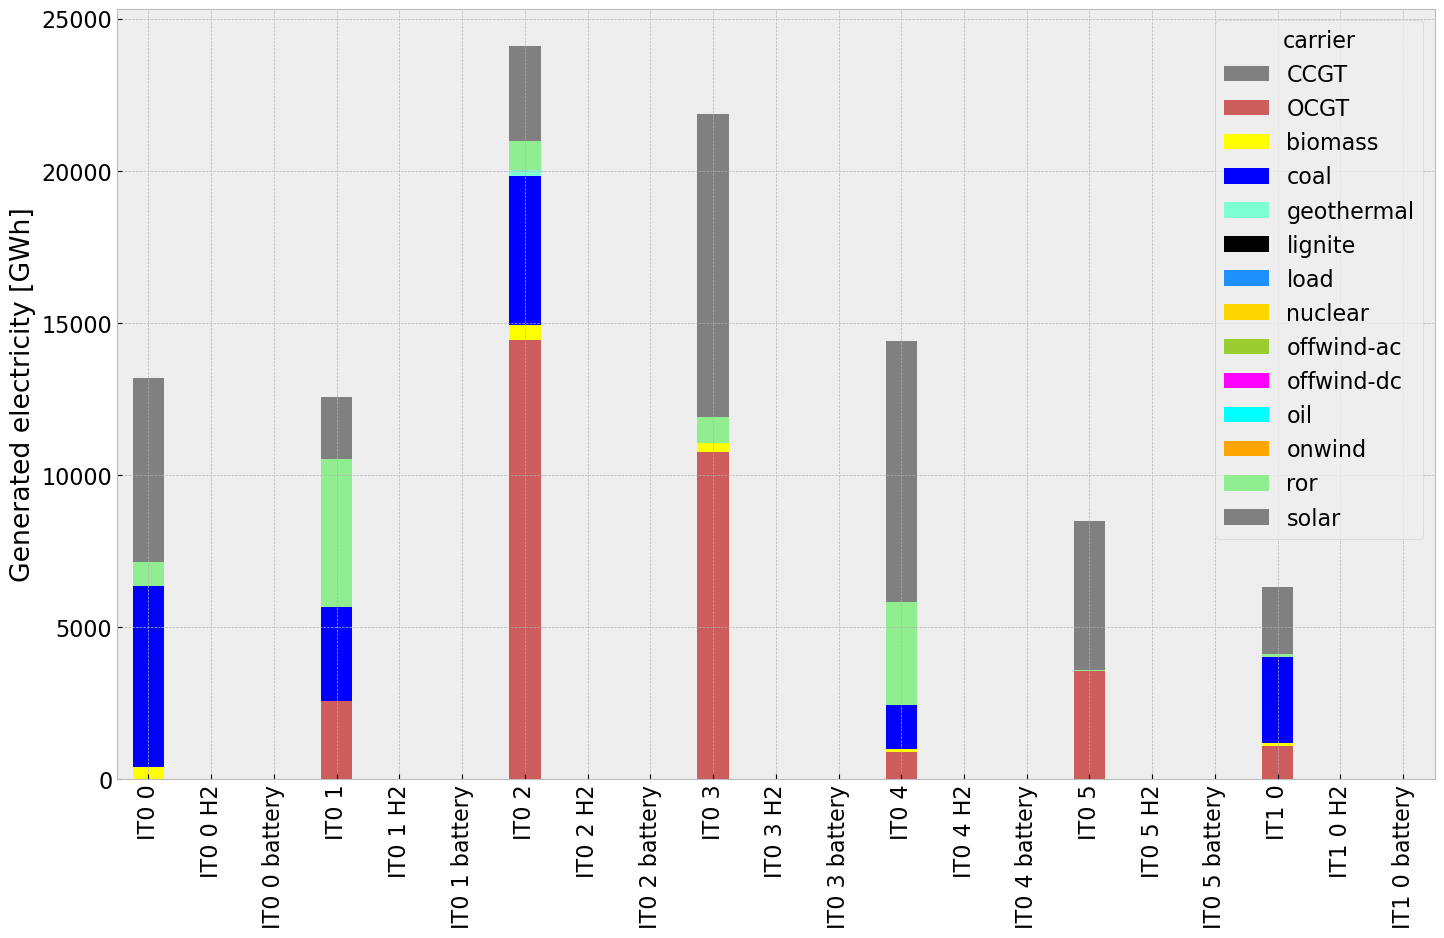

In [48]:
gen_power_table(colors)

In [41]:
def inst_cap_table(colors,gen):

    capacities = gen.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    (capacities.unstack()/1000).drop(columns=['load'],inplace=False).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )

    plt.show()

In [40]:
 capacities = gen.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities.fillna(0, inplace=True)
t = (capacities.unstack()/1000).drop(columns=['load'], inplace=False)
t

carrier,CCGT,OCGT,biomass,coal,geothermal,lignite,nuclear,offwind-ac,offwind-dc,oil,onwind,ror,solar
bus,,,,,,,,,,,,,
IT0 0,0.0,5.6570,0.150,2.415475,0.000,0.0,0.0,0.0,NaN,0.00,0.0,0.56900,12.704433
IT0 0 H2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT0 0 battery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT0 1,0.0,5.4760,0.000,1.209581,0.000,0.0,0.0,0.0,0.0,0.00,0.0,3.47506,7.207156
IT0 1 H2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT0 1 battery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT0 2,0.0,6.7310,0.181,1.963726,0.059,0.0,0.0,0.0,0.0,0.00,0.0,0.68900,7.323837
IT0 2 H2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT0 2 battery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

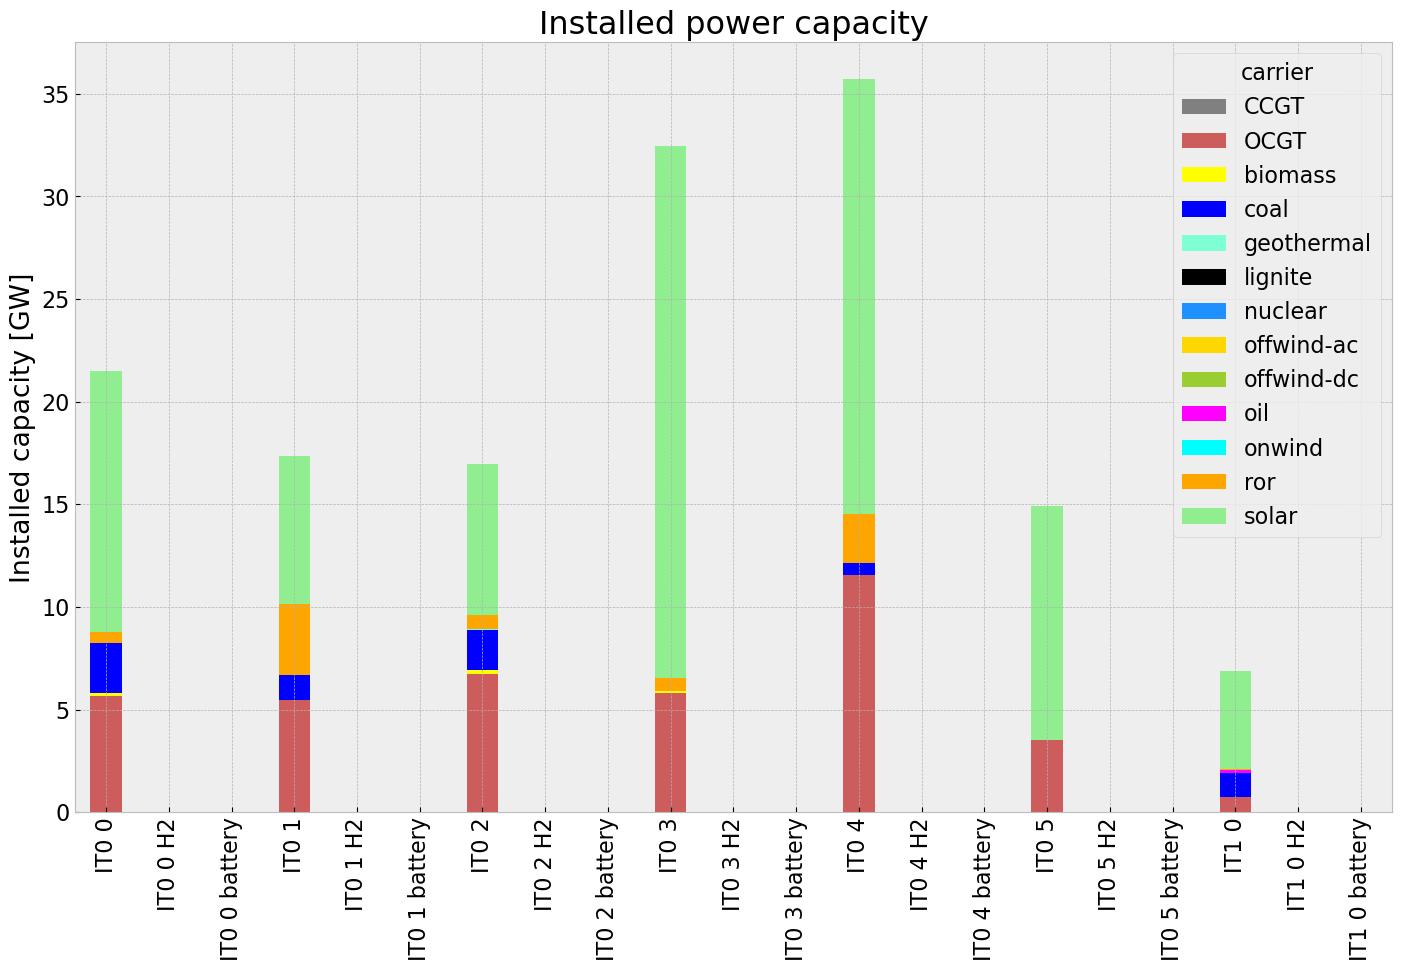

In [42]:
gen = n.generators
inst_cap_table(colors,gen)

In [106]:
def gen_curve_month_summer(colors):

    plt.rcParams.update({'font.size': 16})

    time="2013-03"

    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(14, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-1e10, 2e10)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_5536\3651072260.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_5536\3651072260.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


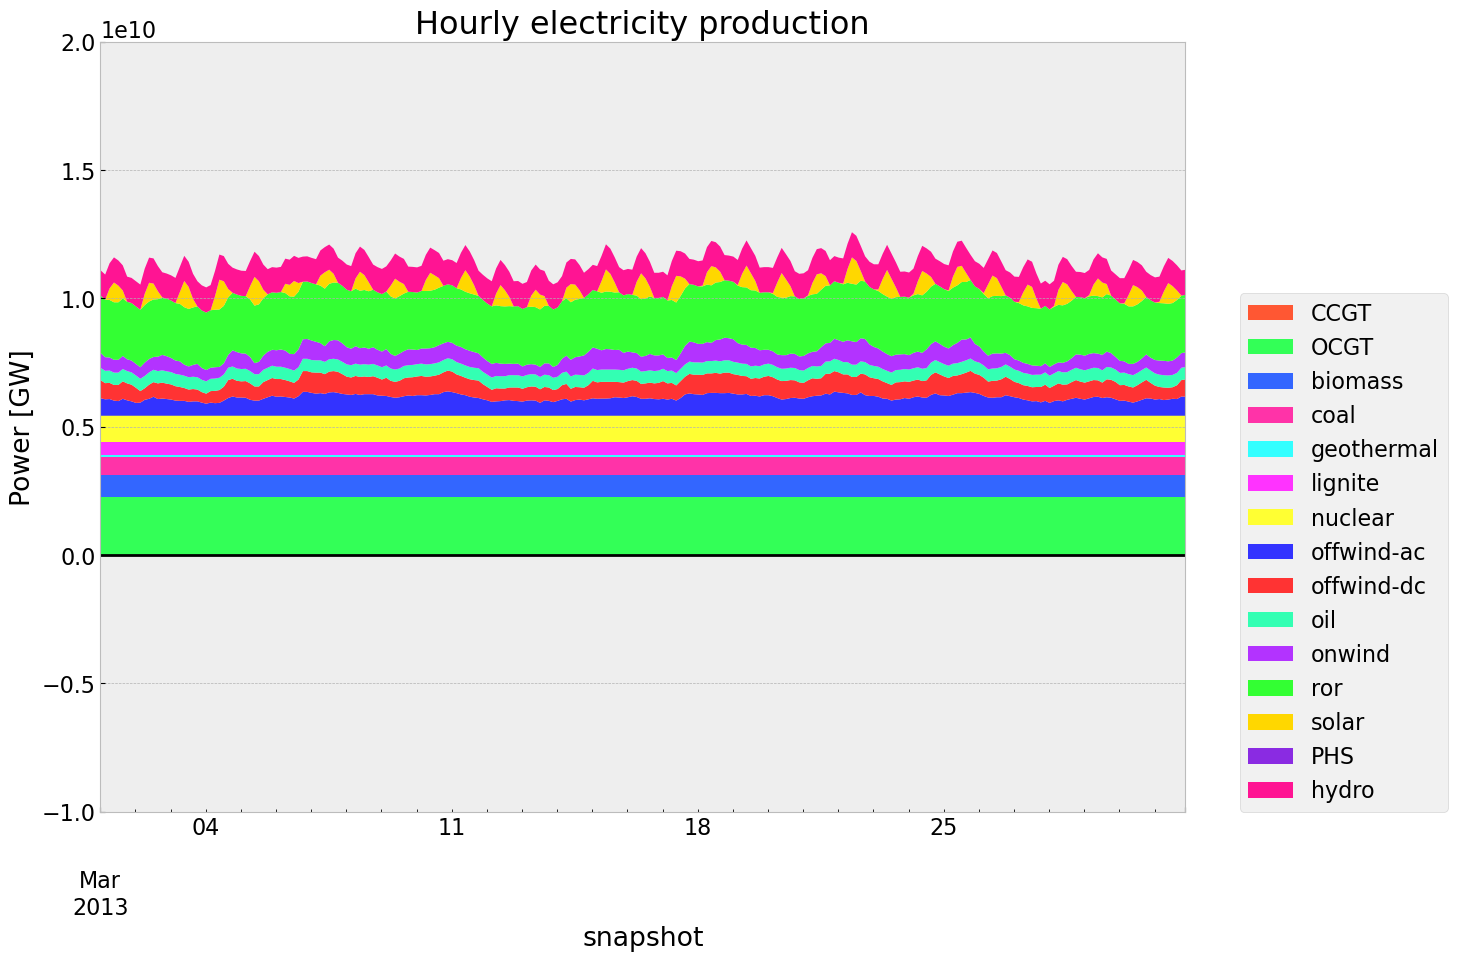

In [107]:
colors_15 = ["#FF5733", "#33FF57", "#3366FF", "#FF33A8", "#33FFFF", "#FF33FF", "#FFFF33", "#3333FF", "#FF3333", "#33FFB3", "#B333FF", "#33FF33", "#FFD700", "#8A2BE2", "#FF1493"]

gen_curve_month_summer(colors_15)

## Demand

In [63]:
#display demand
#n.loads_t.p_set.div(1e3).plot(figsize=(50,50), ylabel="GW")

In [56]:
n.loads_t.p_set.sum(axis=1).loc['2013-03'].div(1e3)

snapshot
2013-03-01 00:00:00    353.151961
2013-03-01 03:00:00    371.499782
2013-03-01 06:00:00    458.840140
2013-03-01 09:00:00    474.198411
2013-03-01 12:00:00    454.963749
                          ...    
2013-03-31 09:00:00    349.287426
2013-03-31 12:00:00    325.077545
2013-03-31 15:00:00    334.431510
2013-03-31 18:00:00    364.912182
2013-03-31 21:00:00    326.689998
Length: 248, dtype: float64

## Storage

In [79]:
def inst_store_table():
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,50]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

carrier,PHS,hydro
bus,,
AL1 0,NaN,1.690700
AT1 0,5.057300,3.600620
BA1 0,0.440000,1.614500
BE1 0,1.308000,0.012783
BG1 0,0.864000,1.925140
CH1 0,5.089550,9.916310
DE1 0,7.599220,0.289500
ES1 0,8.870750,14.975837
FI2 0,NaN,1.295900


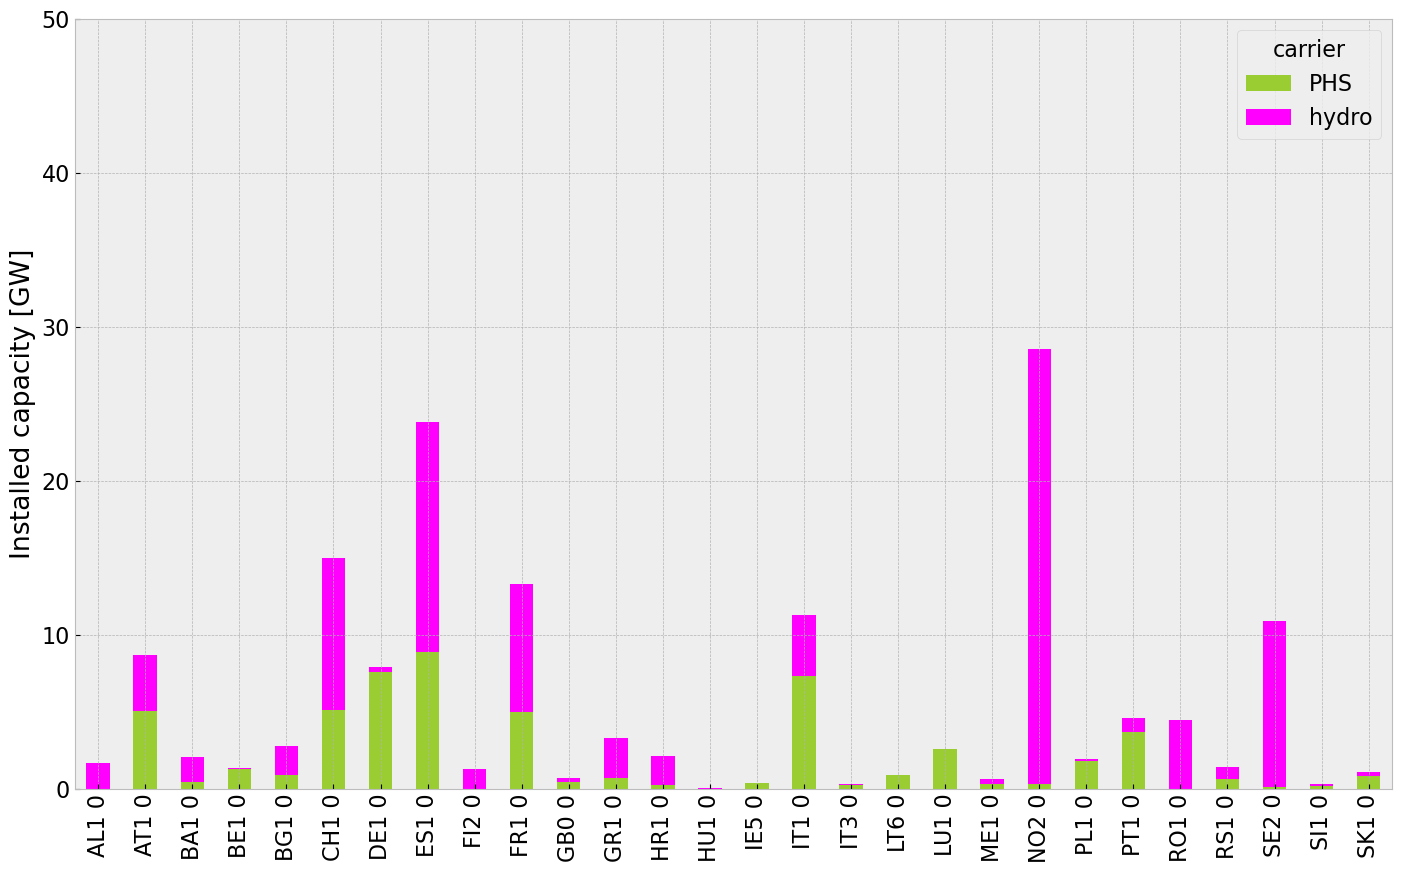

In [80]:
inst_store_table()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_5536\1019775463.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


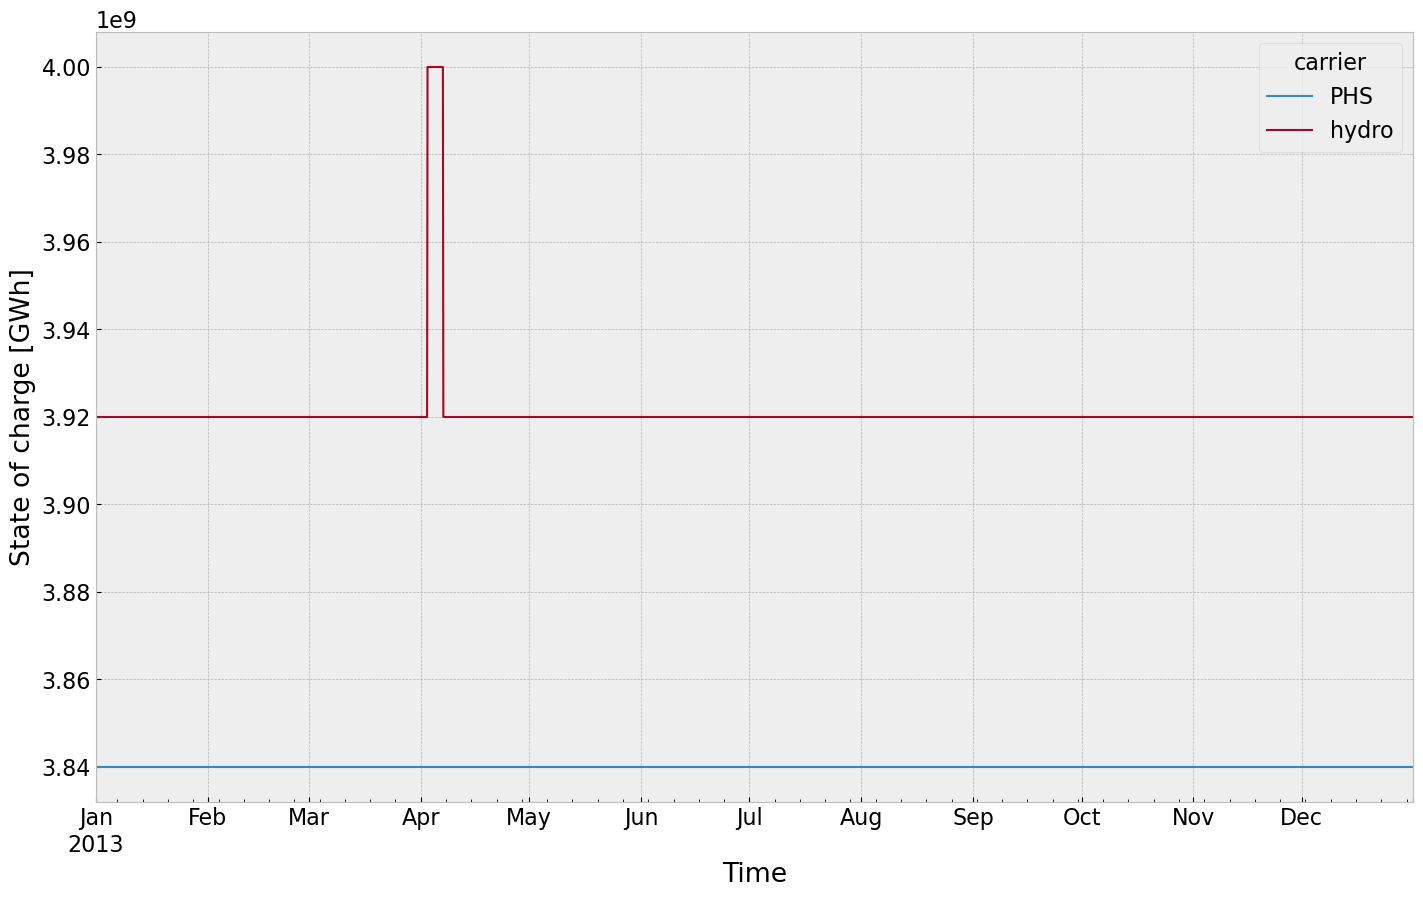

In [101]:
def state_of_charge_plot():
    
    soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    soc.plot(ax=ax,
        grid=True,
        ylabel="State of charge [GWh]",
        xlabel="Time",
        #title=f"State of charge of aggregated storage systems in Italy in {year}",
        linewidth=1.5,
)

plt.show()
state_of_charge_plot()

# Germany 
## Installed Capacity

In [30]:
country_code = 'DE'
gen_DE = n.generators[n.generators.index.str.startswith(country_code)]
gen_DE.head()

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
DE1 0 CCGT,CCGT,DE1 0,0.000000,0.000000,False,0.580000,46.812758,104788.020783,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 OCGT,OCGT,DE1 0,22888.536500,22888.536500,True,0.501555,55.115708,47718.670564,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 biomass,biomass,DE1 0,8004.647826,8004.647826,False,0.468000,15.838314,294201.051170,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 coal,coal,DE1 0,8158.220129,8158.220129,False,0.329804,32.243151,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 geothermal,geothermal,DE1 0,0.000000,0.000000,False,1.000000,0.010850,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


<Figure size 640x480 with 0 Axes>

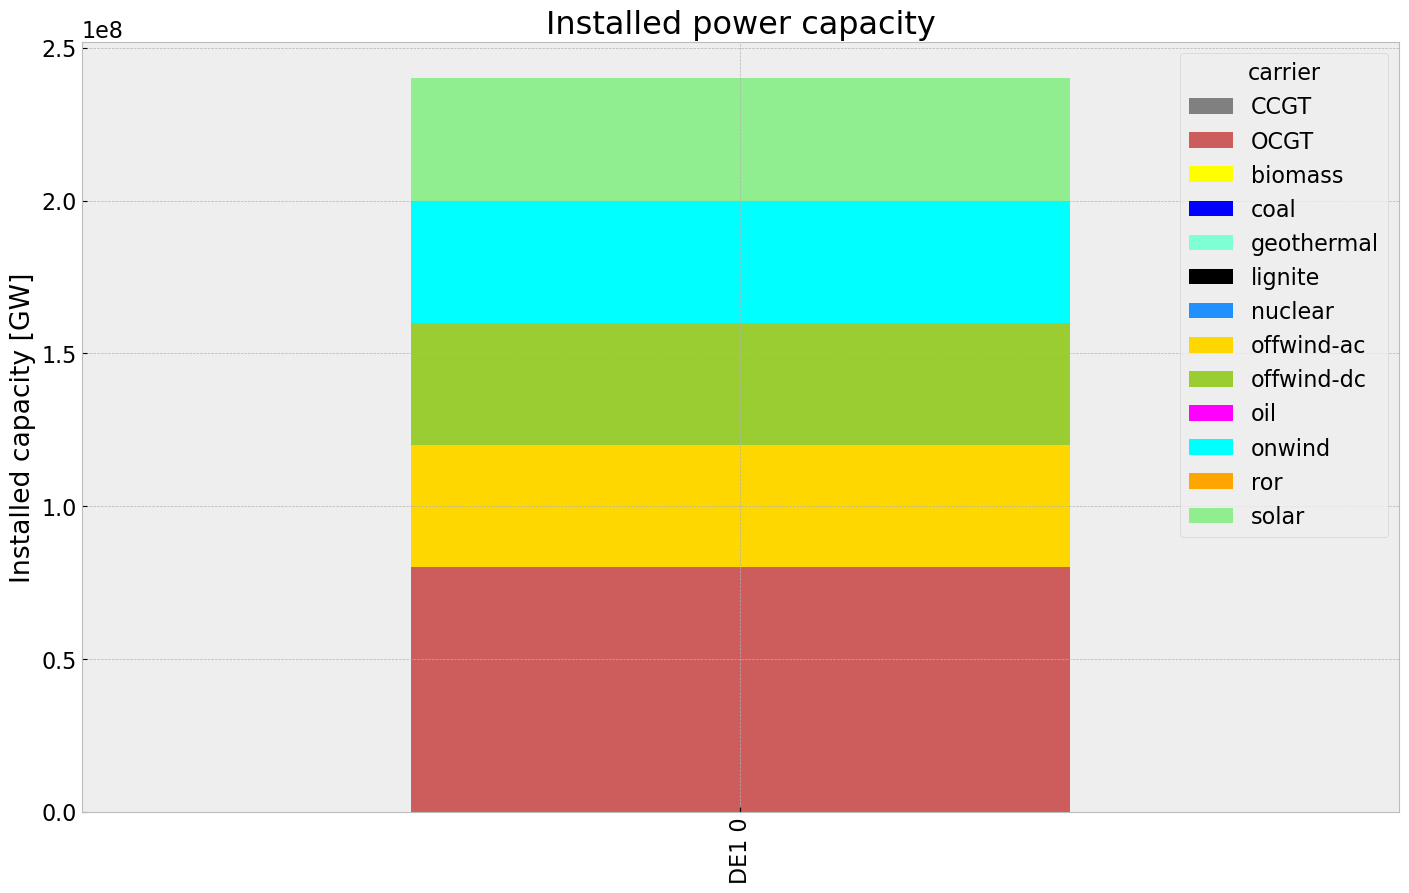

In [48]:
inst_cap_table(colors,gen_DE)

## Generations

<Figure size 640x480 with 0 Axes>

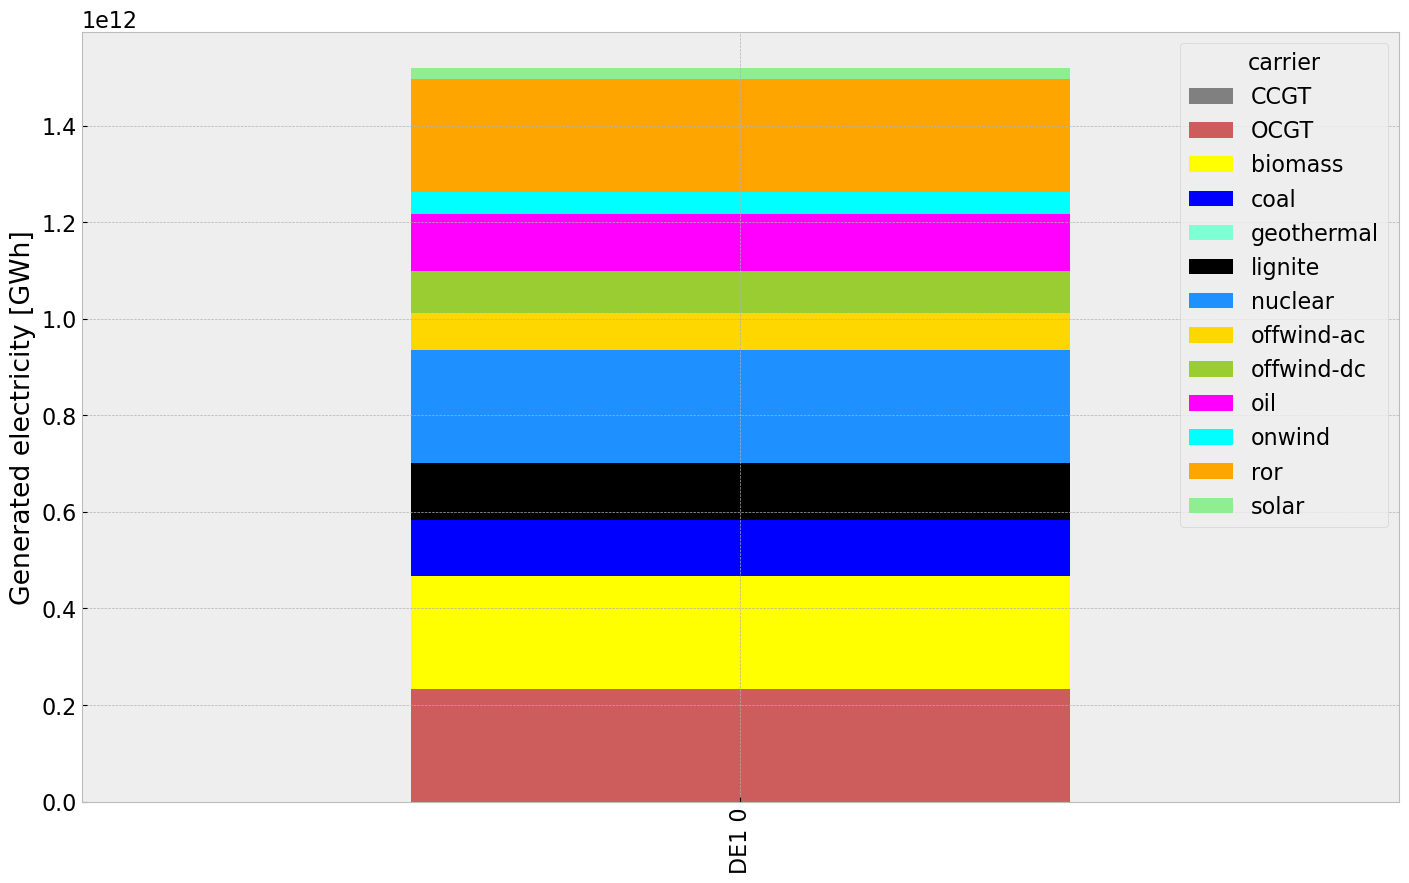

In [53]:
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

generations = generations.unstack().div(1000)
generations_DE = generations[generations.index.str.startswith(country_code)]#selected country's generation composition in GWh

plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations_DE.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()